In [43]:
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt 
import pandas as pd
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
vacunados=pd.read_csv('vacunas.csv')
planVacunarse=pd.read_csv('vacunas_Ecuador.csv')
fabricantes=pd.read_csv('fabricantes.csv')

In [44]:
 # Parameters
fechaInicio = "27/01/2021"
dias = 30
prediccionDia = "2021-05-30"
prediccionDiaFabricantes = "30/05/2021"

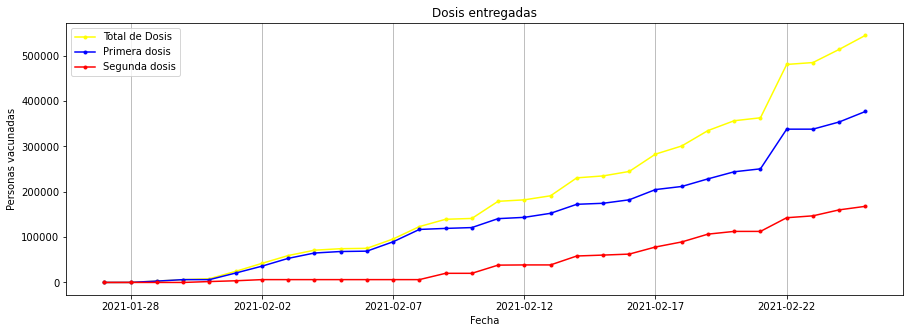

In [45]:
x_fecha=vacunados.fecha=fechaInicio
x_fecha

inicio = datetime.strptime(x_fecha, '%d/%m/%Y')
fin = inicio + dt.timedelta(days=dias)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))

plt.figure(figsize = (15,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.title("Dosis entregadas")
plt.xlabel("Fecha")
plt.ylabel("Personas vacunadas")

plt.plot(days, vacunados.dosis_total[:dias], '.-', label='Total de Dosis', color='Yellow')
plt.plot(days, vacunados.primera_dosis[:dias], '.-', label='Primera dosis', color='Blue')
plt.plot(days, vacunados.segunda_dosis[:dias], '.-', label='Segunda dosis', color='red')

plt.legend()
plt.grid(axis = 'x')

plt.show()

In [46]:
vacunados=vacunados.head(5)
vacunados

,fecha,dosis_total,primera_dosis,segunda_dosis
0,27/01/2021,0,0,0
1,27/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,27/01/2021,6228,6228,0
4,27/01/2021,8190,6228,1962


In [47]:
import pandas as pd
fabricantes=pd.read_csv('fabricantes.csv')
fabricantes=fabricantes.head(5)
fabricantes

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021


In [48]:
import pandas as pd
fabricantes=pd.read_csv('fabricantes.csv')
fabricantes=fabricantes.groupby(['vaccine']).sum()
fabricantes

,total
vaccine,
Oxford/AstraZeneca,420000
Pfizer/BioNTech,659880
Sinovac,1020000


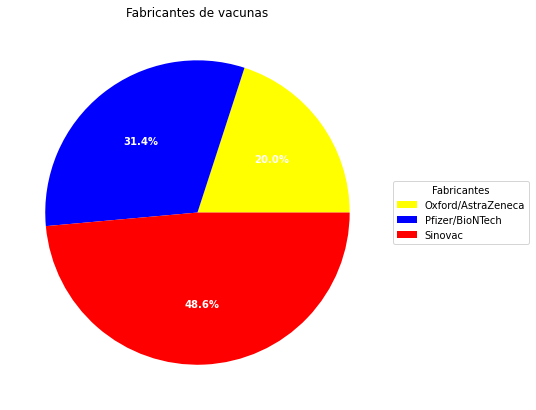

In [202]:
plt.figure(figsize=(12,7))
etiquetas = ['Oxford/AstraZeneca','Pfizer/BioNTech','Sinovac']
colors = ['yellow','blue','red']
plt.pie(fabricantes['total'], autopct='%1.1f%%', startangle=0,colors=colors,textprops={'color':"w",'weight':'bold'})
plt.title('Fabricantes de vacunas')
plt.legend(etiquetas, title="Fabricantes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

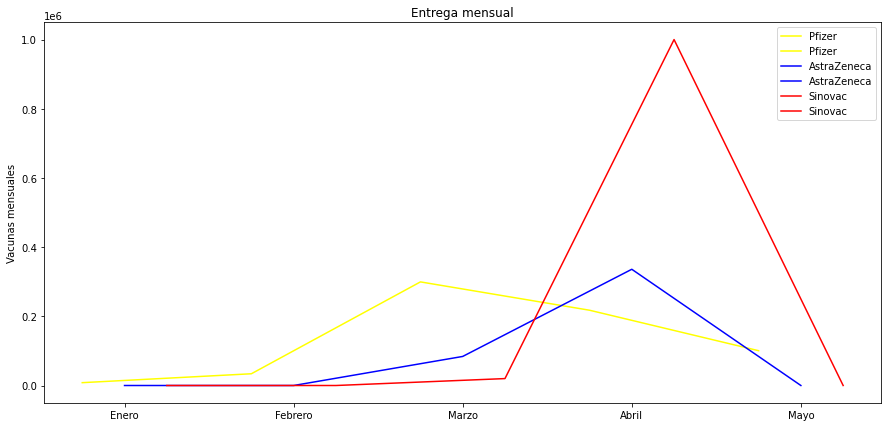

In [198]:
fabricantesHist=pd.read_csv('fabricantes.csv')

fabricantesHist['arrived_at'] = pd.to_datetime(fabricantesHist['arrived_at'], format='%d/%m/%Y')

fabricante = ['Oxford/AstraZeneca' , 'Pfizer/BioNTech', 'Sinovac']
TotalPfizer = [0] * 5
TotalAstraZeneca=[0] * 5
TotalSinovac = [0] * 5

for i in range(len(fabricantesHist)):
    if(fabricantesHist.loc[i, "vaccine"] == fabricante[0]):
        TotalAstraZeneca[fabricantesHist.loc[i, "arrived_at"].month-1] += fabricantesHist.loc[i, "total"]
    elif (fabricantesHist.loc[i, "vaccine"] == fabricante[1]):
        TotalPfizer[fabricantesHist.loc[i, "arrived_at"].month-1] += fabricantesHist.loc[i, "total"]
    elif (fabricantesHist.loc[i, "vaccine"] == fabricante[2]):
        TotalSinovac[fabricantesHist.loc[i, "arrived_at"].month-1] += fabricantesHist.loc[i, "total"]
        
labels = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']

x = np.arange(5)
fig, ax = plt.subplots(figsize=(15,7))
V1 = ax.plot(x, TotalPfizer, 0.25, label='Pfizer', color="Yellow")
V2 = ax.plot(x + 0.25, TotalAstraZeneca, 0.25, label='AstraZeneca', color="Blue")
V3= ax.plot(x + 0.5, TotalSinovac, 0.25, label='Sinovac', color="Red")

ax.set_ylabel('Vacunas mensuales')
ax.set_title('Entrega mensual')
ax.set_xticks(x+0.25)
ax.set_xticklabels(labels)
ax.legend()

plt.show()             

In [50]:
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt 
import pandas as pd
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
vacunados=pd.read_csv('vacunas.csv')
planVacunarse=pd.read_csv('vacunas_planvacunarse.csv')
fabricantes=pd.read_csv('fabricantes.csv')

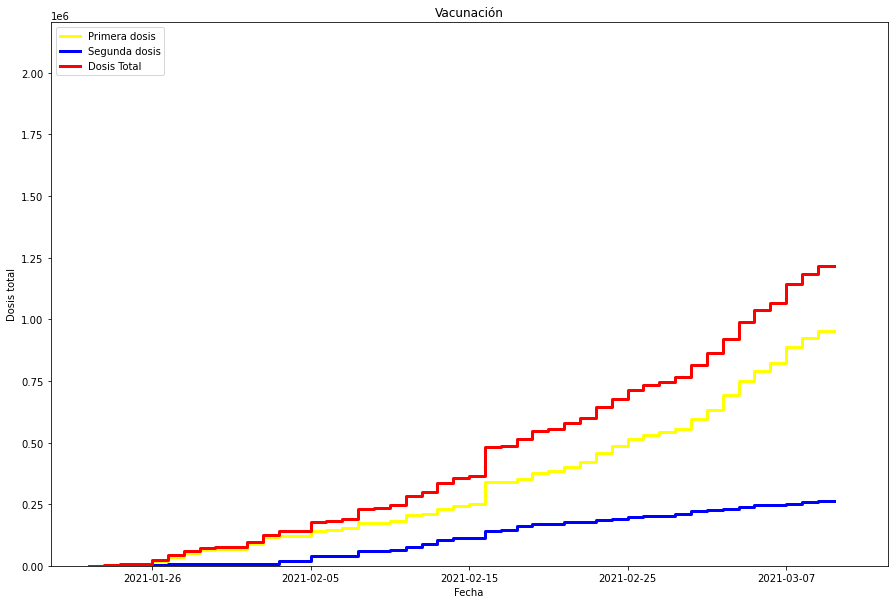

In [51]:
x_fecha=vacunados.fecha

inicio = datetime.strptime(x_fecha.iloc[1], '%d/%m/%Y')
fin = inicio + dt.timedelta(days=48)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))

plt.figure(figsize = (15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

x = vacunados['primera_dosis']
y = vacunados['segunda_dosis']
z = vacunados['dosis_total']
plt.step(days, x, label ='Primera dosis', color='yellow', linewidth=3.0)
plt.step(days, y, label ='Segunda dosis', color='blue', linewidth=3.0)
plt.step(days, z, label ='Dosis Total', color='red', linewidth=3.0)
plt.bar(days[-1], fabricantes['total'].sum(),2, color='white')
plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis total') 
plt.legend()

plt.show()

In [52]:
FMT = '%Y-%m-%d'
planVacunarse['fecha'] = planVacunarse['fecha'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2021-01-01", FMT)).days)
X = planVacunarse['fecha'].values.reshape(-1,1)
y = planVacunarse['primera_dosis'].values.reshape(-1,1)
z = planVacunarse['segunda_dosis'].values.reshape(-1,1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modeloRF1era = RandomForestRegressor(n_estimators=20, random_state=0)
modeloRF1era.fit(X_train, y_train.ravel())

y_pred1 = modeloRF1era.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Prediccion': y_pred1.flatten()}) 
df1.head()

,Actual,Prediccion
0,0,1.10
1,12069,10380.75
2,31,470.85
3,5035,7455.25
4,17558,18655.95


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=0)

modeloRF2da = RandomForestRegressor(n_estimators=20, random_state=0)
modeloRF2da.fit(X_train, y_train.ravel())

y_pred2 = modeloRF2da.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Prediccion': y_pred1.flatten()}) 
df1.head()

,Actual,Prediccion
0,0,1.10
1,313,10380.75
2,0,470.85
3,222,7455.25
4,14873,18655.95


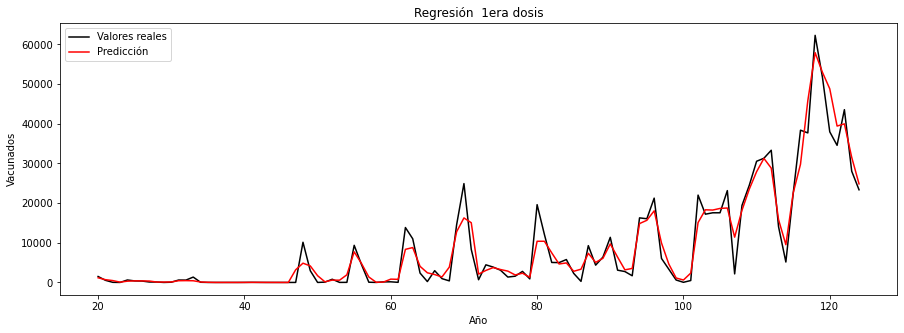

In [55]:
plt.figure(figsize = (15,5))
def rf():
    plt.plot(X, y,'-', label ='Valores reales',color='black')
    plt.plot(X, modeloRF1era.predict(X), label = 'Predicción',color='red')
    plt.title('Regresión  1era dosis')
    plt.xlabel('Año')
    plt.ylabel('Vacunados')
    plt.legend(loc="upper left")
    plt.show()
    return

rf()

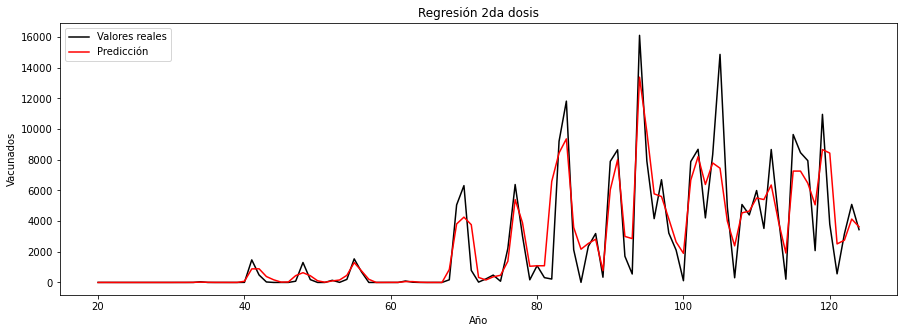

In [56]:
 plt.figure(figsize = (15,5))
def rf():
    plt.plot(X, z,'-', label ='Valores reales',color='black')
    plt.plot(X, modeloRF2da.predict(X),  '-', label = 'Predicción',color='red')
    plt.title('Regresión 2da dosis')
    plt.xlabel('Año')
    plt.ylabel('Vacunados')
    plt.legend(loc="upper left")
    plt.show()
    return

rf()

# REGRESION POLINOMIAL

In [57]:
FMT = '%d/%m/%Y'
fabricantes['arrived_at'] = fabricantes['arrived_at'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2021", FMT)).days)

In [199]:
fabricantes=fabricantes[['arrived_at','total']]
fabricantes

X = fabricantes.iloc[:, :-1].values  
y = fabricantes.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
y_pred2 = pol_reg.predict(poly_reg.fit_transform(X_test)) 
preRF=r2_score(y_test,y_pred2)
print("Precisión del modelo: ", preRF)

Precisión del modelo:  -9.47755846135113


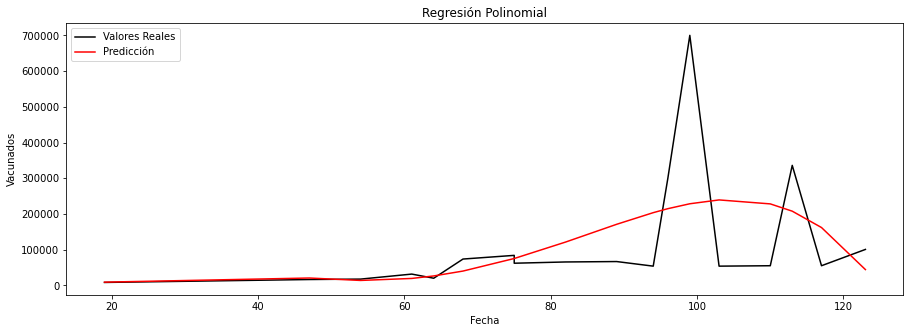

In [60]:
plt.figure(figsize = (15,5))
def polymonial():
    plt.plot(X, y, label ='Valores Reales', color='black')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), label = 'Predicción', color='red')
    plt.title('Regresión Polinomial')
    plt.xlabel('Fecha')
    plt.ylabel('Vacunados')
    plt.legend(loc="upper left")
    plt.show()
    return

polymonial()

# REGRESION LINEAL

In [200]:
x = fabricantes.iloc[:, :-1].values  
y = fabricantes.iloc[:, 1].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
b=regressor.intercept_
m=regressor.coef_
y_pred = regressor.predict(X_test)  
preLin=r2_score(y_test,y_pred)
print("Precisión del modelo: ", preLin)

Precisión del modelo:  -0.7675622720924429


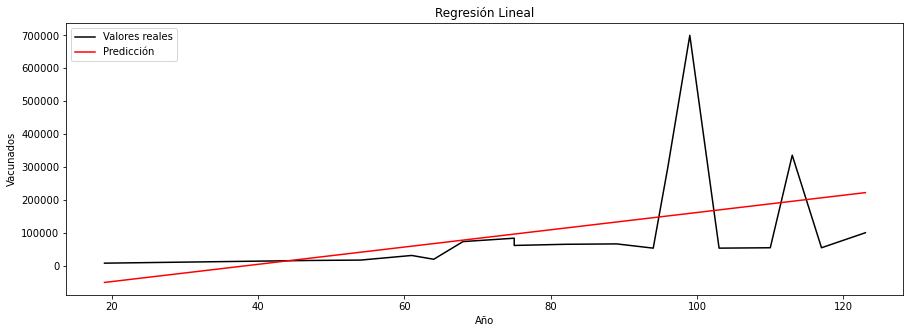

In [65]:
plt.figure(figsize = (15,5))

plt.plot(x, y,'-', label ='Valores reales',color='black')
plt.plot(x, m*x + b, '-', label = 'Predicción',color='red')

plt.title('Regresión Lineal') 
plt.xlabel('Año')
plt.ylabel('Vacunados')
plt.legend(loc="upper left") 

plt.show()

In [201]:
date_string = prediccionDia
FMT = '%Y-%m-%d'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("2021-01-01", FMT)).days
predVacunados = modeloRF1era.predict([[nuevaFecha]])

vacunados1era = pd.DataFrame({'Prediccion primera dosis': predVacunados.flatten()}) 
vacunados1era

,Prediccion primera dosis
0,260175.6


In [202]:
 date_string = prediccionDia
FMT = '%Y-%m-%d'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("2021-01-01", FMT)).days
predVacunados = modeloRF2da.predict([[nuevaFecha]])

vacunados2da = pd.DataFrame({'Prediccion segunda dosis': predVacunados.flatten()}) 
vacunados2da

,Prediccion segunda dosis
0,3628.15


In [207]:
date_string = "30/05/2021"
FMT = '%d/%m/%Y'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("01/01/2021", FMT)).days
y_pred1 = regressor.predict([[nuevaFecha]])

predFab = pd.DataFrame({'Nuevas Vacunas hasta el 30/05/2021': [round(y_pred1[0])]}) 
predFab

,Nuevas Vacunas hasta el 30/05/2021
0,290595


In [208]:

vacunacionChile=pd.read_csv('vacunacion_Chile.csv')
vacunacionEcuador=pd.read_csv('vacunas.csv')
vacunacionInglaterra=pd.read_csv('inglaterra2.csv',sep=';')

In [85]:
vacunacionInglaterra=vacunacionInglaterra.head(48)
vacunacionInglaterra

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,overview,United Kingdom,K02000001,10/1/2021,NaN,2677971,NaN,2286572,NaN,391399
1,overview,United Kingdom,K02000001,11/1/2021,165844.0,2843815,145076.0,2431648,20768.0,412167
2,overview,United Kingdom,K02000001,12/1/2021,223726.0,3067541,207661.0,2639309,16065.0,428232
3,overview,United Kingdom,K02000001,13/1/2021,288688.0,3356229,278943.0,2918252,9745.0,437977
4,overview,United Kingdom,K02000001,14/1/2021,321951.0,3678180,316694.0,3234946,5257.0,443234
5,overview,United Kingdom,K02000001,15/1/2021,345525.0,4023705,341317.0,3576263,4208.0,447442
6,overview,United Kingdom,K02000001,16/1/2021,298751.0,4322456,296131.0,3872394,2620.0,450062
7,overview,United Kingdom,K02000001,17/1/2021,192346.0,4514802,190107.0,4062501,2239.0,452301
8,overview,United Kingdom,K02000001,18/1/2021,208641.0,4723443,204076.0,4266577,4565.0,456866
9,overview,United Kingdom,K02000001,19/1/2021,346922.0,5070365,343163.0,4609740,3759.0,460625


In [70]:
vacunadosChile = vacunacionChile[['Fecha','Total','Total2']]
x=vacunadosChile['Fecha']
y=vacunadosChile['Total']
z=vacunadosChile['Total2']
a=vacunacionEcuador['primera_dosis']
b=vacunacionEcuador['segunda_dosis']
c=vacunacionInglaterra['cumPeopleVaccinatedFirstDoseByPublishDate']
d=vacunacionInglaterra['cumPeopleVaccinatedSecondDoseByPublishDate']

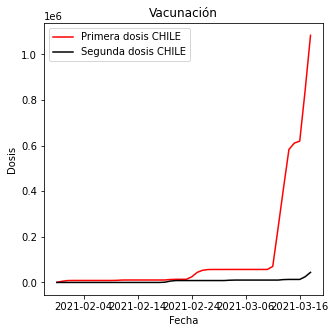

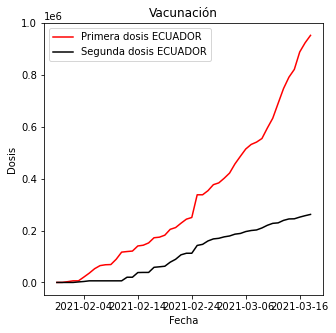

In [71]:
dias=48
inicio = datetime.strptime(x.iloc[vacunadosChile.loc[vacunadosChile['Fecha'] == '2021-01-30'].index[0]], '%Y-%m-%d')
fin = inicio + dt.timedelta(dias)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))
plt.figure(figsize = (5,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(days, y[:dias], label ='Primera dosis CHILE', color='red')
plt.plot(days, z[:dias], label ='Segunda dosis CHILE', color='black')
plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis') 
plt.legend()
plt.show()


dias=48
inicio = datetime.strptime(x.iloc[vacunadosChile.loc[vacunadosChile['Fecha'] == '2021-01-30'].index[0]], '%Y-%m-%d')
fin = inicio + dt.timedelta(dias)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))
plt.figure(figsize = (5,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(days, a[:dias], label ='Primera dosis ECUADOR', color='red')
plt.plot(days, b[:dias], label ='Segunda dosis ECUADOR', color='black')
plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis') 
plt.legend()
plt.show()




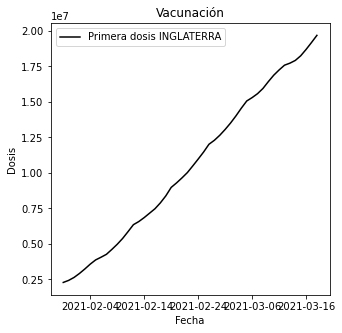

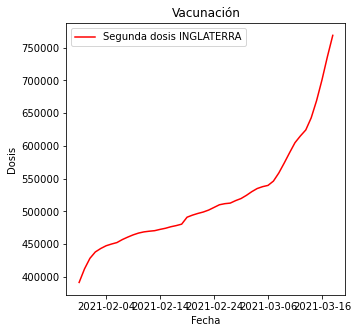

In [383]:

dias=48
inicio = datetime.strptime(x.iloc[vacunadosChile.loc[vacunadosChile['Fecha'] == '2021-01-30'].index[0]], '%Y-%m-%d')
fin = inicio + dt.timedelta(dias)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))
plt.figure(figsize = (5,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(days, c[:dias],'-', label ='Primera dosis INGLATERRA', color='black')
plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis') 
plt.legend()
plt.show()


dias=48
inicio = datetime.strptime(x.iloc[vacunadosChile.loc[vacunadosChile['Fecha'] == '2021-01-30'].index[0]], '%Y-%m-%d')
fin = inicio + dt.timedelta(dias)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))
plt.figure(figsize = (5,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(days, d[:dias],'-', label ='Segunda dosis INGLATERRA', color='red')
plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis') 
plt.legend()
plt.show()

In [72]:
import pandas as pd
import datetime as dt
import numpy as np  
import matplotlib.pyplot as plt  

from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


vacunas=pd.read_csv('vacunas.csv',)
vacunas.head()

,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,04/02/2021,6228,6228,0
4,17/02/2021,8190,6228,1962


In [73]:
FMT = '%d/%m/%Y'
vacunas['fecha'] = vacunas['fecha'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2021", FMT)).days)

vacunas=vacunas[['fecha','segunda_dosis']]
vacunas.head()

,fecha,segunda_dosis
0,20,0
1,21,0
2,26,0
3,34,0
4,47,1962


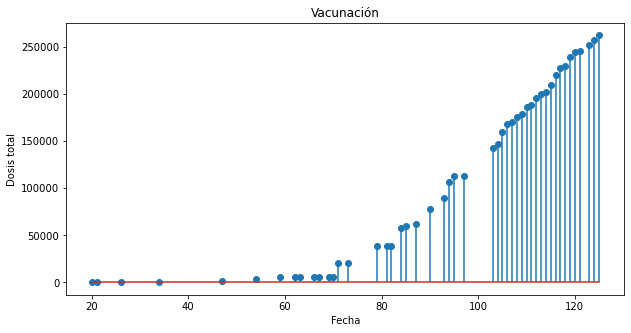

In [74]:
plt.figure(figsize = (10,5))
x = vacunas['fecha'].values.reshape(-1,1)
y = vacunas['segunda_dosis'].values.reshape(-1,1)
plt.stem(x, y,'-', label ='')
plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis total') 

plt.show()

In [81]:
 X = vacunas.iloc[:, :-1].values  
y = vacunas.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

predict = pd.DataFrame({'Actual': y_test, 'Prediccion': y_pred})  
predict

,Actual,Prediccion
0,196350,192003.774098
1,106589,99469.189162
2,239431,235175.191209
3,227972,222433.252620
4,252044,261632.599943
5,62537,70751.217823
6,0,-10990.310564
7,170276,163619.316441
8,6228,1996.204188
9,6228,-2661.408048


In [83]:
date_string = "29/01/2023"
FMT = '%d/%m/%Y'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("01/01/2021", FMT)).days
predTotal = pol_reg.predict(poly_reg.fit_transform([[nuevaFecha]]))
print("Fecha de vacunacion total para el Ecuador")
df1 = pd.DataFrame({date_string: [round(predTotal[0])]}) 
df1

Fecha de vacunacion total para el Ecuador


,29/01/2023
0,17114655


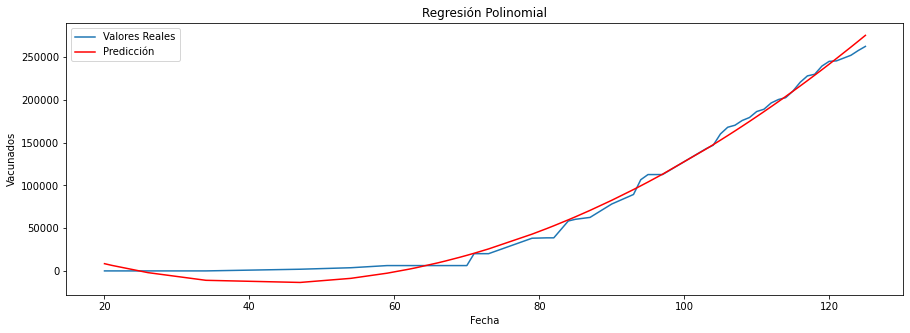

In [80]:
 plt.figure(figsize = (15,5))

plt.plot(x, y,label ='Valores Reales')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(x)), label = 'Predicción', color='red')
plt.title('Regresión Polinomial')
plt.xlabel('Fecha')
plt.ylabel('Vacunados')
plt.legend(loc="upper left")
plt.show()